In [1]:
import math
import numpy as np
from textwrap import wrap
import matplotlib.pyplot as plt

In [2]:
id2class_after_conversion = {
     255 : "unlabeled",
     0 : "road",
     1 : "sidewalk",
     2 : "building",
     3 : "wall",
     4 : "fence",
     5 : "pole",
     6 : "traffic light",
     7 : "traffic sign",
     8 : "vegetation",
     9 : "terrain",
    10 : "sky",
    11 : "preson",
    12 : "rider",
    13 : "car",
    14 : "truck",
    15 : "bus",
    16 : "train",
    17 : "motorcycle",
    18 : "bicycle"
}

In [3]:
NUM_CLASSES = 19

In [4]:
class_list = [id2class_after_conversion[cls] for cls in list(range(NUM_CLASSES))]

In [5]:
mIOU = [90.193739, 59.018873, 75.049805, 14.368795, 21.287363, 45.261925, 12.391436, \
        41.623495, 85.860305, 38.002052, 66.579308, 50.929991, 14.344239, 76.036563, \
        3.512214, 18.451598, 14.161603, 18.630349, 52.544957]

In [6]:
pixelwise_class_distribution = [32.476969101849726, 5.3663645511915705, \
                                19.640807656680835, 0.8515324953223476, \
                                0.9105382967395943, 0.8877134563542214, \
                                0.3224247523716518, 0.6236965275612198, \
                                13.778768908075925, 1.0989381806189273, \
                                3.508161528771665, 1.0602792050658154, \
                                0.1544115723682051, 6.019948366309414, \
                                0.23757280622209823, 0.20745939366957722, \
                                0.2071075439453125, 0.08836755832704175, \
                               0.3309882027762277]
# 12.227949895778623

In [7]:
pixelwise_class_distribution_sqrt = [math.sqrt(dist) for dist in pixelwise_class_distribution]

In [8]:
imagewise_class_distribution = [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, \
                                100.0, 100.0, 99.96638655462185, 99.96638655462185, \
                                99.96638655462185, 99.69747899159664, 98.6890756302521, \
                                98.6890756302521, 69.98319327731092, 65.4453781512605, \
                                62.21848739495798, 60.773109243697476, \
                                55.226890756302524]
# 0.0

In [9]:
imagewise_class_distribution_sqrt = [math.sqrt(dist) for dist in imagewise_class_distribution]

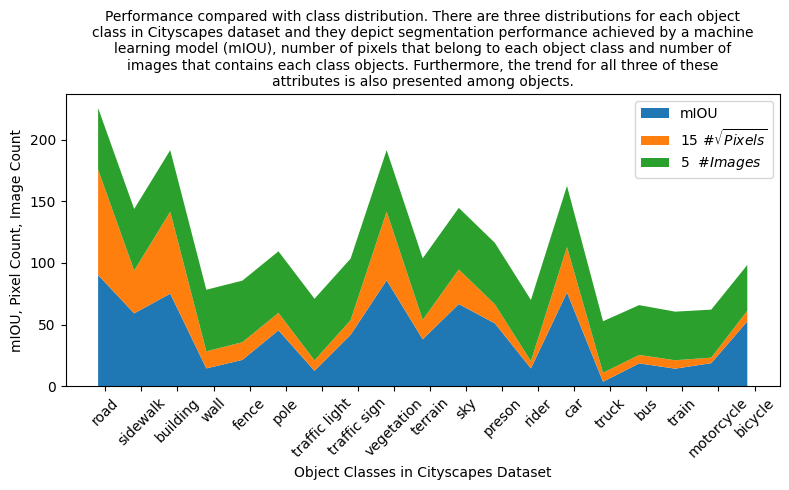

In [10]:
fig, ax = plt.subplots(figsize=(8,5))
bar_width = 0.2
opacity = 0.8

index = np.arange(NUM_CLASSES)
#index = np.arange(1, NUM_CLASSES, 1)

'''
rects1 = plt.bar(index, mIOU, bar_width,
                 alpha=opacity,
                 color='pink',
                 label='mIOU')

liens1 = ax.plot(index, mIOU, bar_width,
                  alpha=opacity,
                  color='pink')

rects2 = plt.bar(index + 1*bar_width, [15*el for el in pixelwise_class_distribution_sqrt], bar_width,
                 alpha=opacity,
                 color='green',
                 label='15 #$\sqrt{Pixels}$')

liens2 = ax.plot(index + 1*bar_width, [15*el for el in pixelwise_class_distribution_sqrt], bar_width,
                 alpha=opacity,
                 color='green')

rects3 = plt.bar(index + 2*bar_width, [5*el for el in imagewise_class_distribution_sqrt], bar_width,
                 alpha=opacity,
                 color='orange',
                 label='5  #$Images$')

liens3 = ax.plot(index + 2*bar_width, [5*el for el in imagewise_class_distribution_sqrt], bar_width,
                 alpha=opacity,
                 color='orange')



'''
plt.stackplot(index, mIOU, [15*el for el in pixelwise_class_distribution_sqrt], \
              [5*el for el in imagewise_class_distribution_sqrt], \
              labels=['mIOU','15 #$\sqrt{Pixels}$','5  #$Images$'])

plt.xlabel('Object Classes in Cityscapes Dataset')
plt.ylabel('mIOU, Pixel Count, Image Count')
plt.xticks(index + bar_width, class_list, rotation=45)
plt.legend()
caption = "Performance compared with class distribution. There are three distributions for each object class in Cityscapes dataset and they depict segmentation performance achieved by a machine learning model (mIOU), number of pixels that belong to each object class and number of images that contains each class objects. Furthermore, the trend for all three of these attributes is also presented among objects."

title = ax.set_title("\n".join(wrap(caption, 92)), fontsize=10)
plt.tight_layout()
plt.show()